In [1]:
# adaptado de: https://colab.research.google.com/drive/13nqdB-kHLIMUxemuQJfnV1bqrLzM3hPS#scrollTo=H-xnmMaNuLoC

In [3]:
# importando as bibliotecas do projeto
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [7]:
# Criando as variaveis do problema
# o comando np.arange funciona da seguinte forma (inicio, final, passo)
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

In [8]:
# criando a primeira regra do problema atraves da funcao triangulo
# a funcao cria automaticamente os seus limites
comida.automf(names=['péssima', 'comível', 'deliciosa'])

In [20]:
# criando a segunda regra do problema atraves da funcao triangulo e da funcao gaussiana
# os ultimos atributos sao os parametros que definem os limites das funceoes
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5])
servico['aceitável'] = fuzz.gaussmf(servico.universe, 5, 2)
servico['excelente'] = fuzz.gaussmf(servico.universe, 10,3)

In [21]:
# criando a terceira regra do problema atraves da funcao triangulo e trapezoidal
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['média'] = fuzz.trapmf(gorjeta.universe, [0, 13,15, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [15, 25, 25])

C:\Users\gusta\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


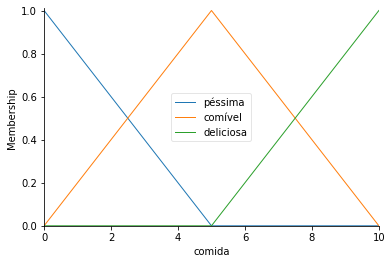

In [15]:
# verificando o grafico da primeira regra
comida.view()

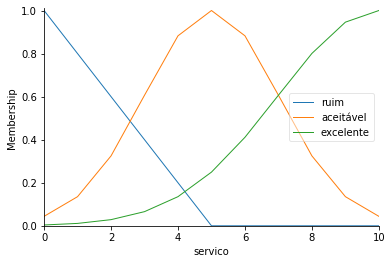

In [16]:
# verificando o grafico da segunda regra
servico.view()

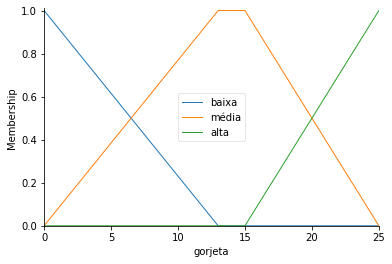

In [17]:
# verificando o grafico da terceira regra
gorjeta.view()

In [24]:
# criando as regras da defuzzificacao
# essas regras sao cosntruidas em cima dos resultados obtidos das regras iniciais
rule1 = ctrl.Rule(servico['excelente'] | comida['deliciosa'], gorjeta['alta'])
rule2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
rule3 = ctrl.Rule(servico['ruim'] & comida['péssima'], gorjeta['baixa'])

# criando um controlador para armazenar as tres regras de defuzzificacao
gorjeta_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)

In [25]:
# Simulando as entradas do problema
gorjeta_simulador.input['comida'] = 3.5
gorjeta_simulador.input['servico'] = 9.4

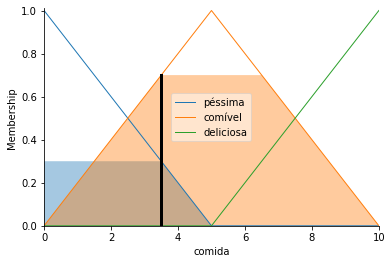

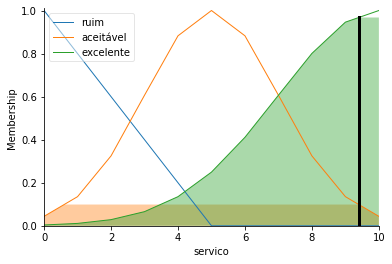

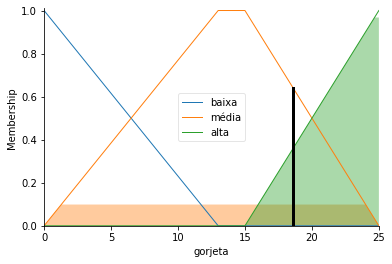

In [27]:
# Mostrando os graficos da inducao fuzzy
comida.view(sim=gorjeta_simulador)
servico.view(sim=gorjeta_simulador)
gorjeta.view(sim=gorjeta_simulador)

In [28]:
# Computando a gorjeta que sera emitida baseado nas entradas
gorjeta_simulador.compute()
print(gorjeta_simulador.output['gorjeta'])

18.57604101547121
